<a href="https://colab.research.google.com/github/likelion-hj/1/blob/master/playwithGooglePlayReview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scrape 1000 Reviews from Google Play (Coinbase)
### 200 reviews from each score of 1 to 5.
https://towardsdatascience.com/create-dataset-for-sentiment-analysis-by-scraping-google-play-app-reviews-using-python-ceaaa0e41c1

In [1]:
#Install library called 'Google-Play-Scraper'
!pip install -qq google-play-scraper

     |████████████████████████████████| 51kB 1.7MB/s 


In [13]:
#Since the library is not Python language, we need more libraries.
import json
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

import google_play_scraper

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

In [25]:
# Get Coinbase's GooglePlay id 
# If you go to the Coinbase page on GooglePlay website, the domain will show you the id of each app https://play.google.com/store/apps/details?id=com.coinbase.android
# Change the id inside the quote(' ') to any other id you want
app_id = 'com.coinbase.android'

In [22]:
app_packages = ['com.coinbase.android', 'com.GoFundMe.GoFundMe']

In [15]:
app_infos = []

for ap in tqdm(app_packages):
  info = app(ap, lang='en', country='us')
  del info['comments']
  app_infos.append(info)

100%|██████████| 2/2 [00:00<00:00,  6.16it/s]


In [20]:
def print_json(json_object):
  json_str = json.dumps(
      json_object,
      indent=2,
      sort_keys=True,
      default=str
  )

  print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [21]:
print_json(app_infos[0])

{
  "title": null,
  "description": null,
  "descriptionHTML": null,
  "summary": null,
  "summaryHTML": null,
  "installs": null,
  "minInstalls": null,
  "score": null,
  "ratings": null,
  "reviews": null,
  "histogram": null,
  "price": null,
  "free": null,
  "currency": null,
  "sale": false,
  "saleTime": null,
  "originalPrice": null,
  "saleText": null,
  "offersIAP": null,
  "size": null,
  "androidVersion": null,
  "androidVersionText": null,
  "developer": null,
  "developerId": null,
  "developerEmail": null,
  "developerWebsite": null,
  "developerAddress": null,
  "privacyPolicy": null,
  "developerInternalID": null,
  "genre": null,
  "genreId": null,
  "icon": null,
  "headerImage": null,
  "screenshots": null,
  "video": null,
  "videoImage": null,
  "contentRating": null,
  "contentRatingDescription": null,
  "adSupported": null,
  "containsAds": null,
  "released": null,
  "updated": null,
  "version": null,
  "recentChanges": null,
  "recentChangesHTML": null,
  "a

In [12]:
app_infos_df = pd.DataFrame(app_infos)
app_infos_df.head()

,title,description,descriptionHTML,summary,summaryHTML,installs,minInstalls,score,ratings,reviews,histogram,price,free,currency,sale,saleTime,originalPrice,saleText,offersIAP,size,androidVersion,androidVersionText,developer,developerId,developerEmail,developerWebsite,developerAddress,privacyPolicy,developerInternalID,genre,genreId,icon,headerImage,screenshots,video,videoImage,contentRating,contentRatingDescription,adSupported,containsAds,released,updated,version,recentChanges,recentChangesHTML,appId,url
0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,False,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,com.coinbase.android,https://play.google.com/store/apps/details?id=...
1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,False,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,com.GoFundMe.GoFundMe,https://play.google.com/store/apps/details?id=...


In [57]:
#Get App Reviews
app_reviews = []


for score in range(1, 6):
  for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
    rvs, _ = reviews(
      app_id,
      lang='en',
      country='us',
      sort=sort_order,
      count= 180000, #This means you will scrap 200 reviews on each score. (You can change the numbers, here)
      filter_score_with=score
    )
  for r in rvs:
    r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
    r['appId'] = app_id
  app_reviews.extend(rvs)

In [58]:
# Check number of rows
len(app_reviews)

58602

In [52]:
app_reviews

[{'appId': 'com.coinbase.android',
  'at': datetime.datetime(2020, 6, 16, 19, 10, 46),
  'content': "These guys don't support Bitcoin.",
  'repliedAt': None,
  'replyContent': None,
  'reviewCreatedVersion': None,
  'reviewId': 'gp:AOqpTOEscuYrxT6Wa1XJTjCSjkVnxYkQPJ2Gnho3JuHjgN8s0N5Qr8KekoActHld13nCN4CyTE0oXapNRt-aMw',
  'score': 1,
  'sortOrder': 'newest',
  'thumbsUpCount': 0,
  'userImage': 'https://lh3.googleusercontent.com/a-/AOh14GiURQiXlW7klmxv86pkOuLXYSox9NLuZK8gVSCAqg',
  'userName': 'Jake Beischlag'},
 {'appId': 'com.coinbase.android',
  'at': datetime.datetime(2020, 6, 16, 14, 51, 41),
  'content': "The app is cool but i click on the earn free crypto link i watched all the videos but I didn't get any reward as promised.",
  'repliedAt': None,
  'replyContent': None,
  'reviewCreatedVersion': '6.50.2',
  'reviewId': 'gp:AOqpTOEZCiYrsFYfF4EXN0jAhMsdDrJ3VMGh1LwatufX5hJUkFXQji_rcXOpxJ9sxdGRSk4r3ipMgT_eVoSDdA',
  'score': 1,
  'sortOrder': 'newest',
  'thumbsUpCount': 0,
  'userI

In [59]:
#Put it in the dataframe and export it to Excel
app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df.to_csv('app_reviews_population.csv', index=None, header=True)

In [64]:
app_reviews_df.to_excel('app_reviews_population.xlsx', index=None, header=True)

In [41]:
!pip install -qq transformers

     |████████████████████████████████| 675kB 2.8MB/s 
     |████████████████████████████████| 1.1MB 14.2MB/s 
     |████████████████████████████████| 3.8MB 18.6MB/s 
     |████████████████████████████████| 890kB 41.0MB/s 


In [43]:
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [80]:
df = pd.read_csv("app_reviews_population.csv")
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOGh9VLSCXms_xZ6fH5N477ZRG5VqqMwGWWd8jj...,amatullahooo,https://lh3.googleusercontent.com/a-/AOh14GgYp...,App not goddamm working..,1,0,NaN,2020-06-16 21:24:05,NaN,NaN,newest,com.coinbase.android
1,gp:AOqpTOEscuYrxT6Wa1XJTjCSjkVnxYkQPJ2Gnho3JuH...,Jake Beischlag,https://lh3.googleusercontent.com/a-/AOh14GiUR...,These guys don't support Bitcoin.,1,0,NaN,2020-06-16 19:10:46,NaN,NaN,newest,com.coinbase.android
2,gp:AOqpTOEZCiYrsFYfF4EXN0jAhMsdDrJ3VMGh1Lwatuf...,Akpan kofi,https://lh3.googleusercontent.com/a-/AOh14GgX1...,The app is cool but i click on the earn free c...,1,0,6.50.2,2020-06-16 14:51:41,NaN,NaN,newest,com.coinbase.android
3,gp:AOqpTOEHdADXGROK5FI90xfqda-SaLxFS6UL3cKkCOp...,Brett Smith,https://lh3.googleusercontent.com/-XGLeL9LZ-lk...,Garbage. Can't withdraw my money to my account...,1,0,6.50.2,2020-06-16 13:32:01,NaN,NaN,newest,com.coinbase.android
4,gp:AOqpTOEVVkHlrxmKfSWSLe2wXfROiSbnp21GRZHBRq6...,Farai Mavengere,https://lh3.googleusercontent.com/-WoN4aRpnb14...,It's a mission to get registered. App keeps ge...,1,0,6.52.1,2020-06-16 12:03:52,NaN,NaN,newest,com.coinbase.android


In [81]:
df.shape

(58602, 12)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58602 entries, 0 to 58601
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              58602 non-null  object
 1   userName              58601 non-null  object
 2   userImage             58602 non-null  object
 3   content               58570 non-null  object
 4   score                 58602 non-null  int64 
 5   thumbsUpCount         58602 non-null  int64 
 6   reviewCreatedVersion  51807 non-null  object
 7   at                    58602 non-null  object
 8   replyContent          1597 non-null   object
 9   repliedAt             1597 non-null   object
 10  sortOrder             58602 non-null  object
 11  appId                 58602 non-null  object
dtypes: int64(2), object(10)
memory usage: 5.4+ MB


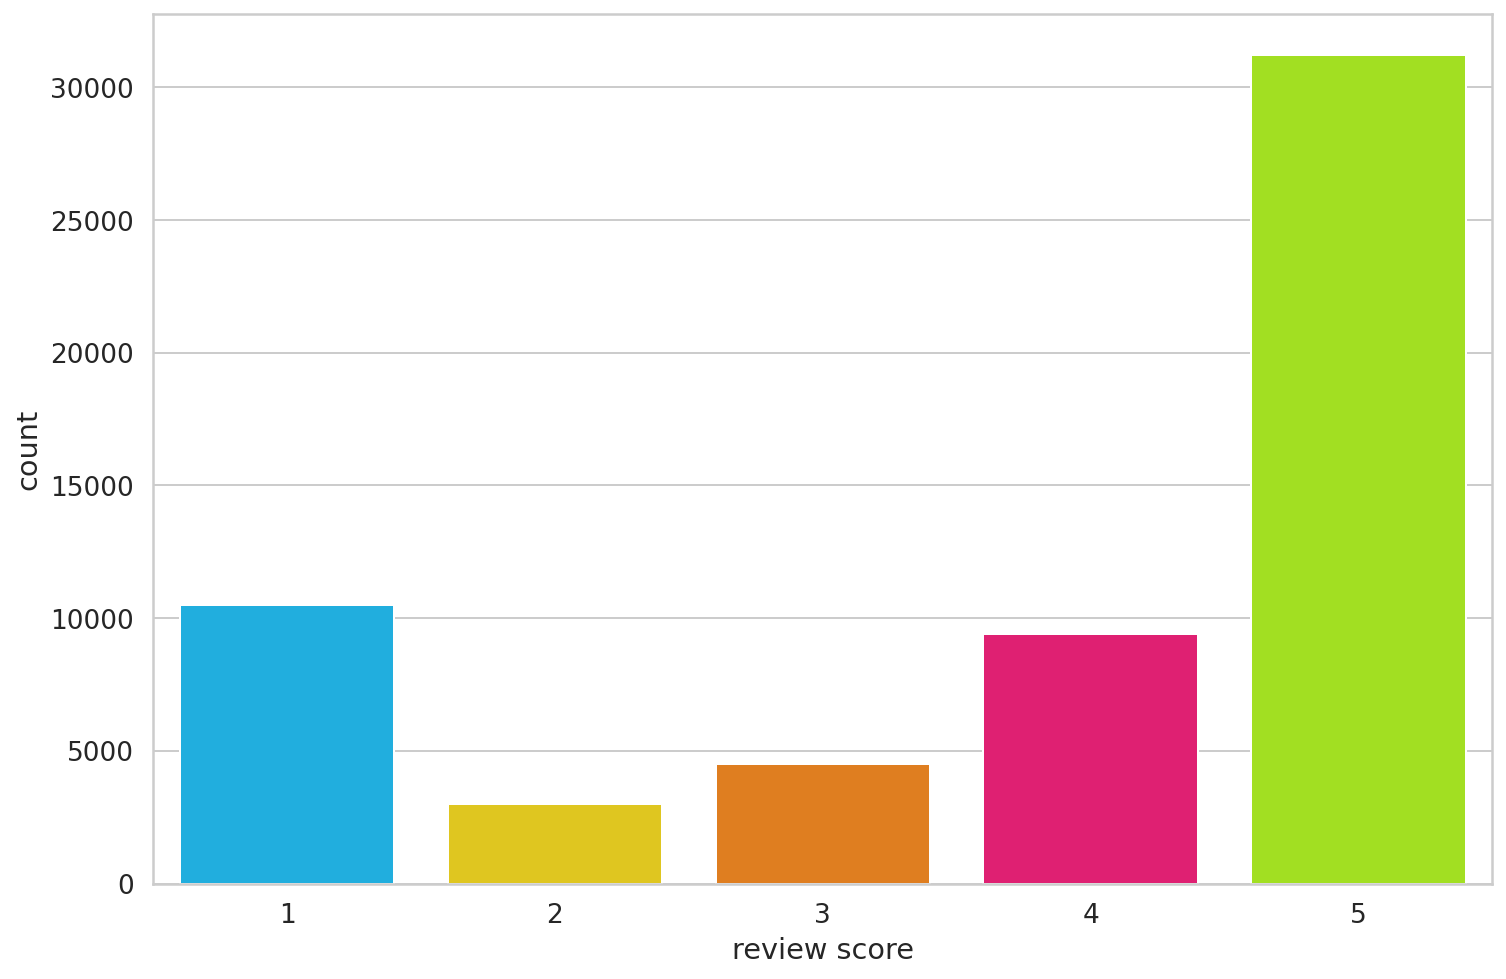

In [63]:
sns.countplot(df.score)
plt.xlabel('review score');

In [65]:
#Sentiment based on the score

def to_sentiment(rating):
  rating = int(rating)
  if rating <= 2:
    return 0
  elif rating == 3:
    return 1
  else:
    return 2
df['sentiment'] = df.score.apply(to_sentiment)

In [66]:
#cluster into 3 groups, negative (1,2), neutral (3), postive (4,5)
class_names = ['negative', 'neutral', 'positive']

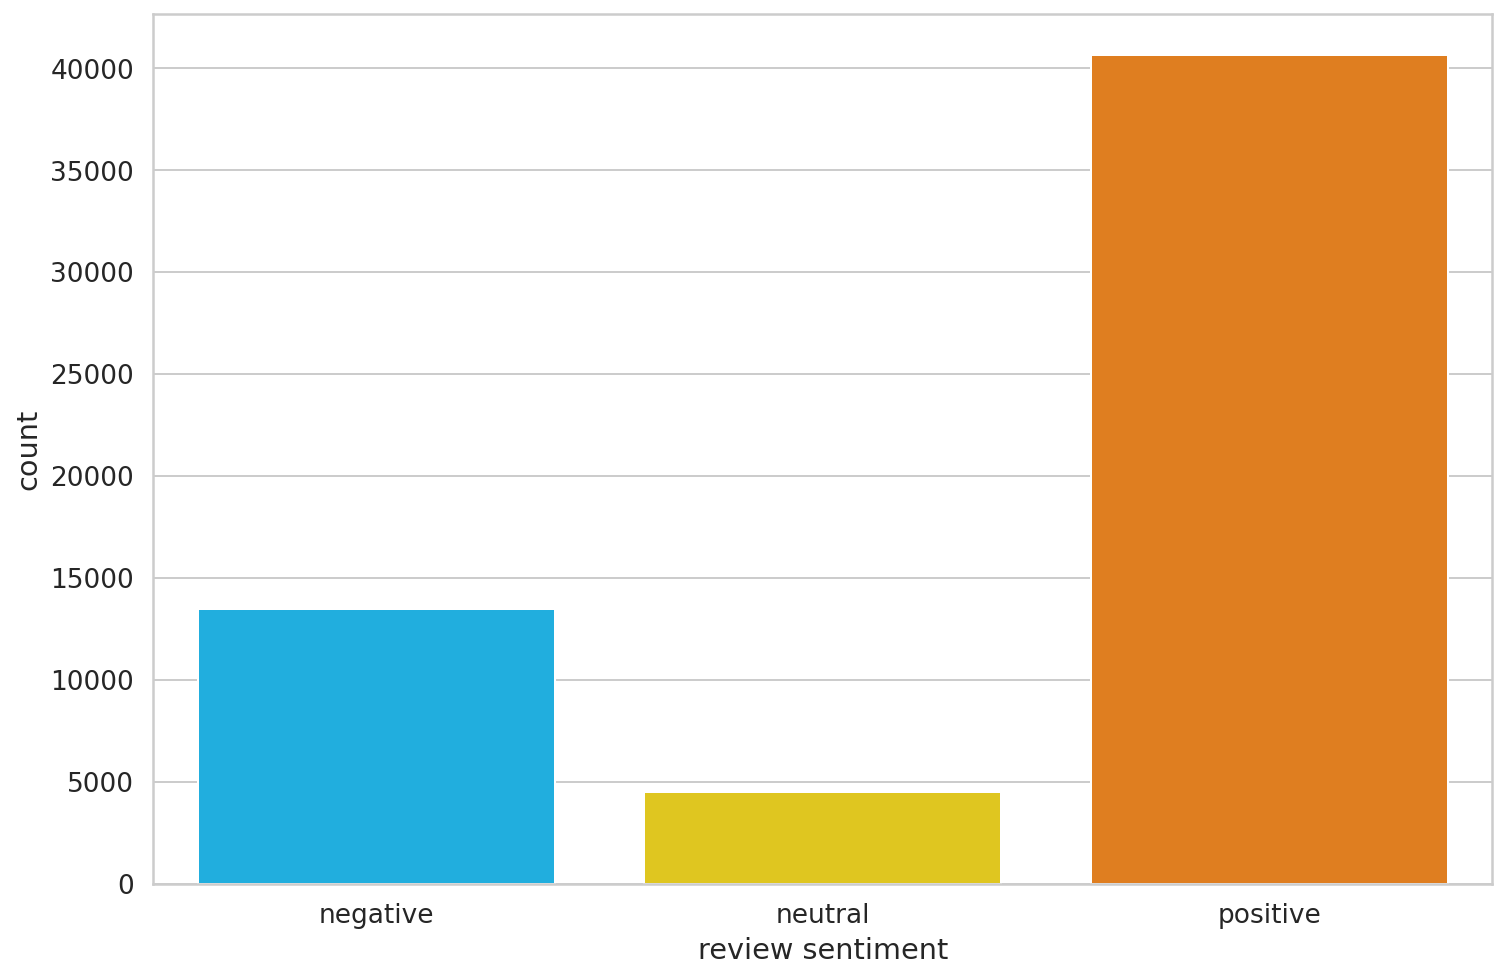

In [67]:
ax = sns.countplot(df.sentiment)
plt.xlabel('review sentiment')
ax.set_xticklabels(class_names);

## Data Preprocessing


In [68]:
PRE_TRAINED_MODEL_NAME = 'bert-base-cased'
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

In [69]:
sample_txt = 'When was I last outside? I am stuck at home for 2 weeks.'
tokens = tokenizer.tokenize(sample_txt)
token_ids = tokenizer.convert_tokens_to_ids(tokens)
print(f' Sentence: {sample_txt}')
print(f'   Tokens: {tokens}')
print(f'Token IDs: {token_ids}')

 Sentence: When was I last outside? I am stuck at home for 2 weeks.
   Tokens: ['When', 'was', 'I', 'last', 'outside', '?', 'I', 'am', 'stuck', 'at', 'home', 'for', '2', 'weeks', '.']
Token IDs: [1332, 1108, 146, 1314, 1796, 136, 146, 1821, 5342, 1120, 1313, 1111, 123, 2277, 119]


In [70]:
tokenizer.sep_token, tokenizer.sep_token_id

('[SEP]', 102)

In [71]:
tokenizer.cls_token, tokenizer.cls_token_id

('[CLS]', 101)

In [72]:
tokenizer.pad_token, tokenizer.pad_token_id

('[PAD]', 0)

In [73]:
tokenizer.unk_token, tokenizer.unk_token_id

('[UNK]', 100)

In [75]:
encoding = tokenizer.encode_plus(
  sample_txt,
  max_length=32,
  add_special_tokens=True, # Add '[CLS]' and '[SEP]'
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',  # Return PyTorch tensors
)
encoding.keys()

dict_keys(['input_ids', 'attention_mask'])

In [76]:
encoding['input_ids']

tensor([[ 101, 1332, 1108,  146, 1314, 1796,  136,  146, 1821, 5342, 1120, 1313,
         1111,  123, 2277,  119,  102,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0]])

In [86]:
encoding['attention_mask']

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]])

In [87]:
tokenizer.convert_ids_to_tokens(encoding['input_ids'][0])

['[CLS]',
 'When',
 'was',
 'I',
 'last',
 'outside',
 '?',
 'I',
 'am',
 'stuck',
 'at',
 'home',
 'for',
 '2',
 'weeks',
 '.',
 '[SEP]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]']

In [90]:
df.dtypes

reviewId                object
userName                object
userImage               object
content                 object
score                    int64
thumbsUpCount            int64
reviewCreatedVersion    object
at                      object
replyContent            object
repliedAt               object
sortOrder               object
appId                   object
dtype: object

In [95]:
token_lens = []
for txt in df.content:
  tokens = tokenizer.encode(txt, max_length=512)
  token_lens.append(len(tokens))

AttributeError: ignored

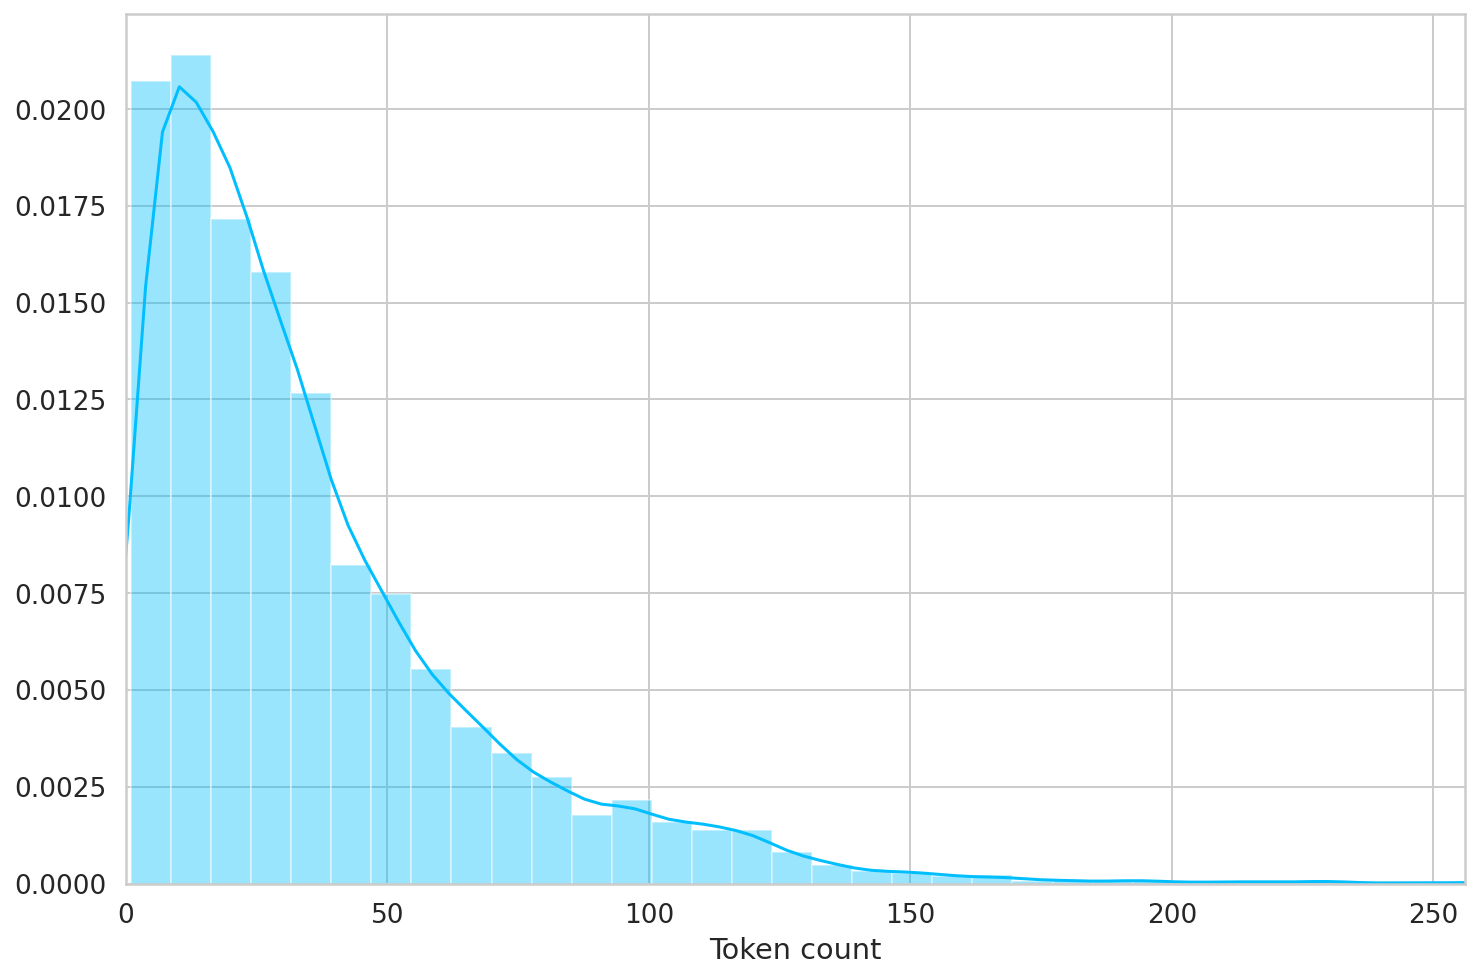

In [96]:
sns.distplot(token_lens)
plt.xlim([0, 256]);
plt.xlabel('Token count');

In [99]:
df.content.head()

0                            App not goddamm working..
1                    These guys don't support Bitcoin.
2    The app is cool but i click on the earn free c...
3    Garbage. Can't withdraw my money to my account...
4    It's a mission to get registered. App keeps ge...
Name: content, dtype: object

In [100]:
review_test = []

for c in df.content:
  review_test.append(c)

In [101]:
review_test

['App not goddamm working..',
 "These guys don't support Bitcoin.",
 "The app is cool but i click on the earn free crypto link i watched all the videos but I didn't get any reward as promised.",
 "Garbage. Can't withdraw my money to my account because of constant errors and timeouts. It sure added my money easily though.",
 "It's a mission to get registered. App keeps getting stuck at various stages.",
 'My widget stopped working when I update to this version',
 'Tried to upload photo on the desktop and Coinbase says my photo is blurry. Tried many times with different angles and lighting. No success. My drivers license is definitely not blurry. Downloaded app to my phone to try that way and now app says too many attempts. Try in 24 hours. Most aggravating is that the app is the only way to voice my unpleasant experience. There is no other way that I saw on website how to contact tech support. There is no way I am waiting 24hrs. Going somewhere else.',
 'I transferred LTC from another a

In [102]:
len(review_test)

58602

AttributeError: ignored

In [104]:
def count_words_fast(text):      #counts word frequency using Counter from collections 
    text = text.lower() 
    skips = [".", ", ", ":", ";", "'", '"'] 
    for ch in skips: 
        text = text.replace(ch, "") 
    word_counts = Counter(text.split(" ")) 
    return word_counts 

In [119]:
with open('app_reviews_population.txt', encoding="utf8", errors='ignore') as f:
  contents = f.read()

In [120]:
contents[:100]

'A\x00p\x00p\x00\t\x00n\x00o\x00t\x00\t\x00g\x00o\x00d\x00d\x00a\x00m\x00m\x00\t\x00w\x00o\x00r\x00k\x00i\x00n\x00g\x00\t\x00\t\x00\t\x00\t\x00\t\x00\t\x00\t\x00\t\x00\t\x00\t\x00\t\x00\t\x00\t\x00\t\x00\t\x00\t\x00\t\x00\t\x00\t\x00\t\x00\t\x00\t\x00\t\x00\t\x00\t\x00\t\x00\t\x00'